<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 06 - Raízes de equações**

## ➥ Uma equação e uma variável
---

Vamos tratar inicialmente dos métodos mais simples para determinar as raízes de uma única equação contendo uma única variável independente. 

A primeira ideia que surge é buscar pelas regiões aonde ocorre mudança de sinal da função e então tomar o ponto médio como aproximação da raiz. Uma aproximação melhor para a raiz seria interpolar os dois pontos — nos quais ocorre mudança de sinal — por uma reta e determinar aonde esta reta corta o eixo x. Podemos denominar esses métodos mais óbvios de Métodos de "Força Bruta". A figura abaixo exemplifica o procedimento descrito.

![brute-force-root-find](https://github.com/bgeneto/MCA/blob/main/imagens/brute-force-root-find.png?raw=true)

Considerando a equação da reta que passa pelos pontos $x_1$ e $x_2$, temos que o valor de $x$ para o qual $y=0$ é dado por:

$$
x = x_1 - y_1\frac{x_2 - x_1}{y_2 - y_1}
$$



## ➥ Implementação Trivial em Python
---

Vamos implementar o método descrito anteriormente em Python de maneira despretenciosa. Para tanto, vamos utilizar a função senoidal $\sin(10x)$ como exemplo/teste: 

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# frequência
f = 10

# malha de pontos (valores da variável independente, tipicamente o tempo)
x = np.linspace(0, np.pi, 100)

# função
y = np.sin(f*x)

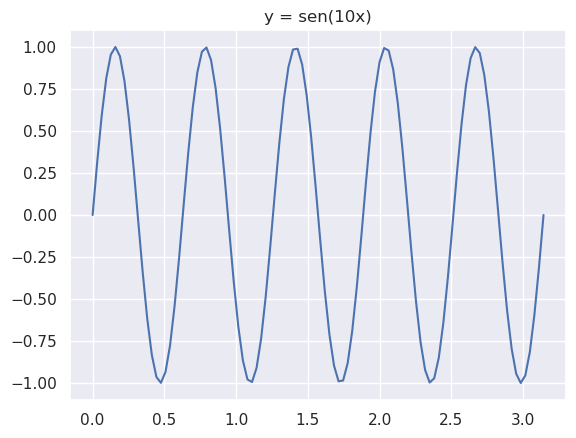

In [12]:
sns.lineplot(x=x, y=y).set(title=f"y = sen({f}x)")
plt.show()
plt.close()

Agora vamos procurar pelas mudanças de sinal da função, isto é, vamos testar a condição $f(x_1)\times f(x_2) < 0$ de uma maneira bem "Pythônica", sem loops nem condicionais. 

In [13]:
# localiza todos os índices (posições no vetor y) que contém mudanças de sinal
idx = np.where(np.diff(np.signbit(y)))[0]
idx

array([ 9, 19, 29, 39, 49, 59, 69, 79, 89])

Note que `idx` é um array numpy que contém os índices de todos os pontos $x_1$. Assim, em Python, podemos calcular todas as (aproximações) raízes 

In [14]:
i1 = idx      # índice de x1 (antes de y = 0)
i2 = idx+1    # índice de x2 (depois de y = 0)
# ponto que corta o eixo x (raiz aproximada)
r = x[i1] - y[i1]*(x[i2] - x[i1])/(y[i2] - y[i1])
print("As raízes são:", r)

As raízes são: [0.31412061 0.62826713 0.94243291 1.25661144 1.57079633 1.88498121
 2.19915974 2.51332552 2.82747205]


> Note que encontramos todas as raízes no domínio desejado $[0, 2\pi)$ sem escrever nenhum loop (comando de repetição) explícito ou condicional!

Para melhorar a precisão dos valores encontrados podemos, sempre que possível, aumentar o número de pontos. Algumas funções mal comportadas podem requerer um número bem grande de pontos. Vamos a um novo exemplo agora utilizando a função $y = \text e^{-x^2}\cos 4x$. Vamos primeiramente visualizar tal função no intervalo $[0, 4)$

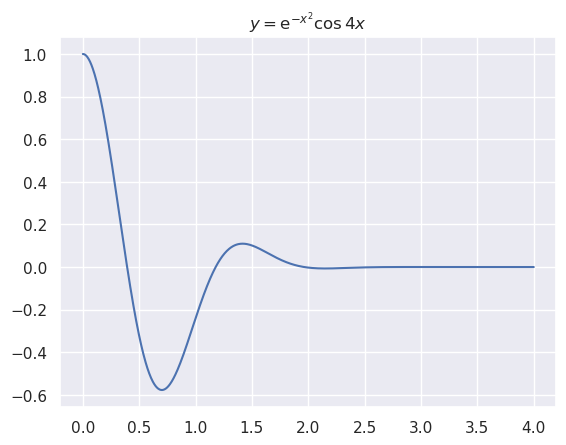

In [15]:
# pontos (abscissa)
x = np.linspace(0, 4, 1000)

# função (ordenada)
y = np.exp(-x**2)*np.cos(4*x)

sns.lineplot(x=x, y=y).set(title=r"$y = \mathrm{e}^{-x^2}\cos 4x$")
plt.show()
plt.close()

 Vamos dar um zoom na área assintótica e observar que algumas raízes podem não aparecer visualmente... 

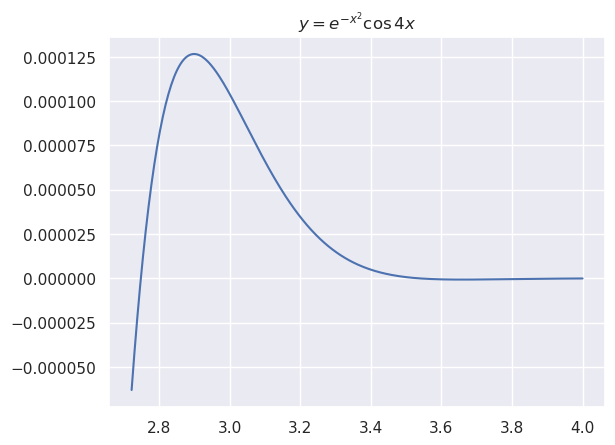

In [16]:
sns.lineplot(x=x[680:], y=y[680:]).set(title=r"$y = e^{-x^2}\cos 4x$")
plt.show()

Será que nosso algoritmo consegue localizar essa raiz? Vejamos... Mas para não ter que repetir o mesmo código sempre que quisermos encontrar as raízes de uma função, vamos organizar nosso código usando POO (Programação Orientada a Objetos) e colocar tudo dentro de uma classe.

In [17]:
class RootFind:
    def __init__(self, x, y):
        self.x = x 
        self.y = y 
        self.pts = len(x)
        
    def brute_force(self):
        idx = np.where(np.diff(np.signbit(self.y)))[0]
        i1 = idx      # índice de x1 (antes de y = 0)
        i2 = idx + 1  # indice de x2 (depois de y = 0)
        r = self.x[i1] - self.y[i1]*(self.x[i2] - self.x[i1])/(self.y[i2] - self.y[i1])
        return r
    
    def brute_force2(self):
        """versão ligeiramente mais rápida"""
        idx = self.y[1:]*self.y[:-1] < 0
        x1 = self.x[:-1][idx]
        x2 = self.x[1:][idx]
        y1 = self.y[:-1][idx]
        y2 = self.y[1:][idx]
        r = x1 - y1*(x2 - x1)/(y2 - y1)
        return r        

In [18]:
rf = RootFind(x, y)
aprox = rf.brute_force()
aprox

array([0.39269999, 1.17810397, 1.96351033, 2.74891547, 3.53431585])

Pelo visto a raiz em torno de 2.7 foi localizada com sucesso. As raízes exatas dessa função são dadas por $\frac{1}{8}\pi(2n - 1)$, onde $n$ é o número (posição) da raiz desejada. Vamos comparar com os valores obtidos:

In [19]:
n = np.array([1, 2, 3, 4, 5])
exato = np.pi/8*(2*n-1)
exato

array([0.39269908, 1.17809725, 1.96349541, 2.74889357, 3.53429174])

In [20]:
# erro absoluto 
erro_abs = np.abs(aprox - exato)
print("Erro absoluto:", erro_abs)

Erro absoluto: [9.05906008e-07 6.72520298e-06 1.49174602e-05 2.18973380e-05
 2.41176009e-05]


In [21]:
# erro relativo percentual 
erro_perc = 100*np.abs(aprox - exato)/exato
print("Erro relativo percentual:", erro_perc)

Erro relativo percentual: [0.00023069 0.00057085 0.00075974 0.00079659 0.00068239]


## ➥ O Método de Newton
---

O método de Newton-Raphson, também conhecido como método de Newton, é um método numérico iterativo para encontrar as raízes (ou zeros) de uma função. Ele começa com uma suposição inicial para a raiz e, em seguida, refina iterativamente a suposição até que uma raiz suficientemente precisa seja encontrada. O método é baseado na ideia de que uma função pode ser aproximada localmente por uma reta tangente em um ponto próximo à raiz, e a raiz pode ser encontrada movendo iterativamente a reta tangente até um ponto onde a função é zero.

A ideia do método advém da própria definição de derivada num ponto:

\begin{align*}
f'(x) &= \lim _{{\Delta x \to 0}}{\frac  {f(x+h)-f(x)}{\Delta x}} \\
      &= \lim _{{\Delta x \to 0}}{\frac  {f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}}.
\end{align*}

Assim, podemos generalizar para uma fórmula iterativa de Newton-Raphson usando a seguinte expressão:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},
$$
na qual: 

- $x_{n+1}$ é a próxima aproximação da raiz.

- $x_n$ é a aproximação atual da raiz.

- $f(x_n)$ é o valor da função na aproximação atual.

- $f'(x_n)$ é a derivada da função da aproximação atual.

<div align="center">
<video width="1280" height="720" 
       src=https://github.com/bgeneto/MCA/blob/main/videos/newton-raphson-method.webm?raw=true 
       type=video/webm controls> 
</video>
</div>

### ➭ Uma implementação ingênua em Python

In [22]:
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    """
    Método de Newton-Raphson para encontrar raízes.

    Parâmetros:
    f (função): A função para a qual encontrar a raiz.
    f_prime (função): A derivada da função.
    x0 (float): A estimativa inicial para a raiz.
    tol (float): A tolerância para convergência (o padrão é 1e-6).
    max_iter (int): O número máximo de iterações (o padrão é 100).

    Retorna:
    float: A raiz aproximada.
    """
    for i in range(max_iter):
        fpx = f_prime(x0)
        x = x0 - f(x0)/fpx
        if abs(x - x0) < tol:
            return x        
        x0 = x
    raise ValueError("O método de Newton-Raphson não convergiu!")

Exemplo de uso: encontrar a raiz positiva da função $x^2 - 4$.

In [23]:
# Exemplo de uso:
import math

# Define a função e a sua derivada
f = lambda x: x**2 - 4
f_prime = lambda x: 2*x

# Chute inicial para a raiz
x0 = 1

r = newton_raphson(f, f_prime, x0)

print("Raiz aproximada:", r)

Raiz aproximada: 2.000000000000002


Podemos incluir esta função como um método diretamente em nossa classe `RootFind`. Mas vamos precisar fazer alguns ajustes no design da classe...

In [24]:
class RootFind:

    def brute_force(self, x, y):
        """
        Calcula todas as raízes aproximadas no domínio implicitamente fornecido em x.
        """
        self.x = x 
        self.y = y 
        self.pts = len(x)
        idx = np.where(np.diff(np.signbit(self.y)))[0]
        i1 = idx      # índice de x1 (antes de y = 0)
        i2 = idx + 1  # indice de x2 (depois de y = 0)
        r = self.x[i1] - self.y[i1]*(self.x[i2] - self.x[i1])/(self.y[i2] - self.y[i1])
        return r
    
    def newton_raphson(self, f, f_prime, x0, tol=1e-6, max_iter=100):
        """
        Método de Newton-Raphson para encontrar raízes.

        Parâmetros:
        f (função): A função para a qual encontrar a raiz.
        f_prime (função): A derivada da função.
        x0 (float): A estimativa inicial para a raiz.
        tol (float): A tolerância para convergência (o padrão é 1e-6).
        max_iter (int): O número máximo de iterações (o padrão é 100).

        Retorna:
        float: A raiz aproximada.
        """
        for i in range(max_iter):
            fpx = f_prime(x0)
            x = x0 - f(x0)/fpx
            if abs(x - x0)/abs(x) < tol:
                return x        
            x0 = x
        raise ValueError("O método de Newton-Raphson não convergiu!")   

Vamos repetir o cálculo das raízes para o nosso exemplo com a função exponencial anterior:

In [25]:
f = lambda x: np.exp(-x**2)*np.cos(4*x)
f_prime = lambda x: np.exp(-x**2)*(-2*x*np.cos(4*x) - 4*np.sin(4*x))

x0 = 0.1

rf = RootFind()

rf.newton_raphson(f, f_prime, x0, tol=1e-4)

3.534291715331653

Note como as primeiras raízes foram puladas! Porque isso aconteceu? Qual é a explicação? 
Para entender por que isto ocorreu temos que observar qual é o comportamento da derivada da função no ponto x0 = 0.1. O gráfico abaixo mostra exatamente a primeira tangente calculada no método de Newton para x = 0.1:

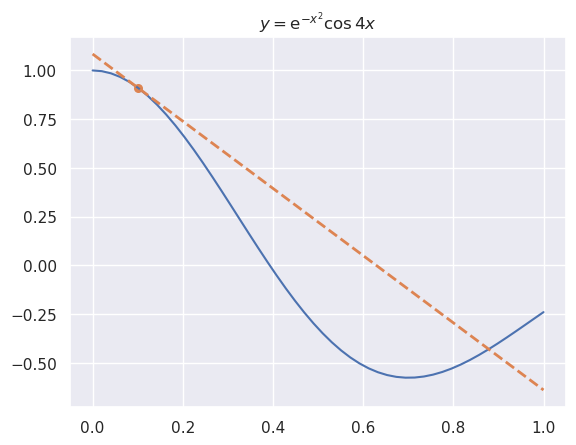

In [26]:
x = np.linspace(0, 1)
y = f(x)
plt.plot(x, y)
plt.title(r"$y = \mathrm{e}^{-x^2}\cos 4x$")
plt.scatter(x0, f(x0), color='C1', s=30)
xrange = np.linspace(0, 1)
plt.plot(xrange, f_prime(x0)*(x - x0) + f(x0), 'C1--', linewidth = 2)
plt.show()

Vejamos agora uma simulação da sequência de estimativas (tangentes) computadas pelo método de Newton:

In [27]:
from manim import *
config.media_width = "90%"
config.verbosity = "WARNING"

Manim Community v0.17.3

In [28]:
%%manim -v WARNING --disable_caching -ql NewtonRaphson

class NewtonRaphson(MovingCameraScene):
    # set up interval 
    xival = [-0.25, 4]
    yival = [-1, 1]
    
    def construct(self):
        self.camera.frame.save_state()
        # set up the axes
        axes = Axes(
            x_range=[*self.xival, 0.5],
            y_range=[*self.yival, 0.5],
            x_length=2*max(self.xival),
            y_length=6*max(self.yival),
            #x_axis_config={"numbers_to_include": np.arange(0, 4, 0.5)},
            axis_config={"include_numbers": True},
            tips=False
        )
        
        # Plot the function
        graph = axes.plot(lambda x: f(x), x_range=[*self.xival], color='#FFFF00', use_smoothing=False)

        # Create a dot for the initial guess
        x0 = 0.1
        dot = Dot(color=RED).move_to(axes.coords_to_point(x0, f(x0)))

        # Create a line representing the tangent
        tangent = self.get_tangent_line(x0, f, f_prime, axes)

        # Add elements to the scene
        self.play(Create(axes), Create(graph), Create(dot))

        # Iterate the Newton-Raphson method
        iterations = 0
        while iterations < 5:
            tangent = self.get_tangent_line(x0, f, f_prime, axes)
            x0 = self.x0 #tangent.get_end()[0]            
            dot = Dot(color=RED).move_to(axes.coords_to_point(x0, f(x0)))
            line = axes.get_vertical_line(dot.get_center(), line_func=DashedLine)
            self.play(
                Create(tangent),
                Create(dot),
                Create(line),
                run_time=2,
            )
            if iterations >= 2:
                self.play(self.camera.frame.animate.scale(0.75).move_to(dot))
            iterations += 1
        
        # return to center/origin and zoom out
        self.play(self.camera.frame.animate.scale(4).move_to(ORIGIN))        

        # Wait for a moment and then remove elements from the scene
        self.wait(1)
        self.play(
            FadeOut(tangent, shift=DOWN),
            FadeOut(dot, shift=UP),
            FadeOut(line, shift=DOWN),
            FadeOut(graph, shift=UP),
            FadeOut(axes, shift=DOWN),
        )

    def get_tangent_line(self, x0, f, f_prime, axes):
        x = np.linspace(x0 - 0.25, x0 + 0.25, 100)
        y = lambda x: f_prime(x0) * (x - x0) + f(x0)
        self.x0 = x0 - f(x0)/f_prime(x0)
        tangent = axes.plot(y, x_range=self.xival, color=BLUE)
        return tangent

![NewtonRaphson](https://github.com/bgeneto/MCA/blob/main/imagens/NewtonRaphson.gif?raw=true)

[Animação: NewtonRaphson](https://github.com/bgeneto/MCA/blob/main/videos/NewtonRaphson.mp4)

> Observe como na terceira iteração já estamos distantes das primeiras raízes e bem próximos do valor 3.53 encontrado!

Percebemos assim, que o método de Newton deve receber um chute inicial muito próximo raiz desejada. Seria interessante empregá-lo, portanto, com um método de localiza as raízes, como o método de "força bruta" estudado anteriormente. 